<a href="https://colab.research.google.com/github/ShaileshaPMaganahalli/Machine_Learning/blob/master/Shailesha_014512264_ML_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shailesha_014512264 - Midterm Individual Assignment**

# **Business Use Case and Value:**

The German Credit data set (available at http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data) contains observations on credit scores of numerous applicants. Each applicant was rated as good credit
bad credit. We want to develop a credit scoring rule that can be used to determine if a new applicant is a good credit risk or a bad credit risk,
based on values for one or more of the predictor variables.

In [1]:
# Shailesha - 014512264 
# Advanced Machine Learning : 
# Midterm Individual - Assignment - 4/8/2020

import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import numpy as np 
import plotly.figure_factory as ff



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Libraries for modelling
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from collections import defaultdict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

# **Data Intialization and Loading**

In [0]:
# loading german dataset

datasetURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
dataset=requests.get(datasetURL).content

In [4]:

# defining column headings for the dataset
columns = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 'residencesince', 
            'property', 'age', 'otherinstallmentplans', 'housing', 'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# loading into dataframe
df=pd.read_csv(io.StringIO(dataset.decode('utf-8')),names = columns, delimiter=' ')
print(df.shape)
df.head(10)

(1000, 21)


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


# **Data Pre-Processing**

In [5]:
# dataframe information display
# Check for any data pre-processing activity

df.classification.replace([1,2], [1,0], inplace=True)
df.classification.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [6]:
# check for null values
print(df.isnull().sum().sum())

0


In [7]:
# dataframe information display
# Check for any data pre-processing activity and drop unwanted factors
# Check for any NaN, NULL, Min, Max, Avg variation
factors = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']
features = pd.DataFrame(StandardScaler().fit_transform(df[factors].drop(['classification'], axis=1)))
features.describe()

,0,1,2,3,4,5,6
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.771561e-17,1.332268e-16,1.163965e-16,-3.117506e-16,3.597123e-17,-5.928591e-17,-2.887690e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.070865e+00,-1.402415e+00,-1.764514e+00,-1.672459e+00,-1.455261e+00,-7.049260e-01,-4.282896e-01
25%,-6.754833e-01,-7.386675e-01,-8.701833e-01,-7.659773e-01,-7.516417e-01,-7.049260e-01,-4.282896e-01
50%,-3.373443e-01,-2.408572e-01,2.414692e-02,1.405047e-01,-2.239269e-01,-7.049260e-01,-4.282896e-01
75%,2.484620e-01,2.569531e-01,9.184772e-01,1.046987e+00,5.676451e-01,1.027079e+00,-4.282896e-01
max,5.370789e+00,4.239436e+00,9.184772e-01,1.046987e+00,3.470076e+00,4.491089e+00,2.334869e+00


In [0]:

# Label details and encoder

details = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince','statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 'telephone', 'foreignworker']
labels = defaultdict(LabelEncoder)
lbEncoder = df[details].apply(lambda x: labels[x.name].fit_transform(x))
variables = pd.get_dummies(df[details])
df_details = pd.concat([df[factors], variables], axis = 1)
X_df = df_details.drop('classification', axis=1)
df_credit=df_details
Y_df = df_details['classification']

In [9]:
Y_df.head(5)

0    1
1    0
2    1
3    1
4    0
Name: classification, dtype: int64

In [10]:
X_df.head(5)

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,employmentsince_A75,statussex_A91,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,1169,6,4,4,67,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,5951,48,2,2,22,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,2096,12,2,3,49,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,7882,42,2,4,45,1,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,4870,24,3,4,53,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0



# **Plots and Visualiztion**

**Outlier Idetifications**

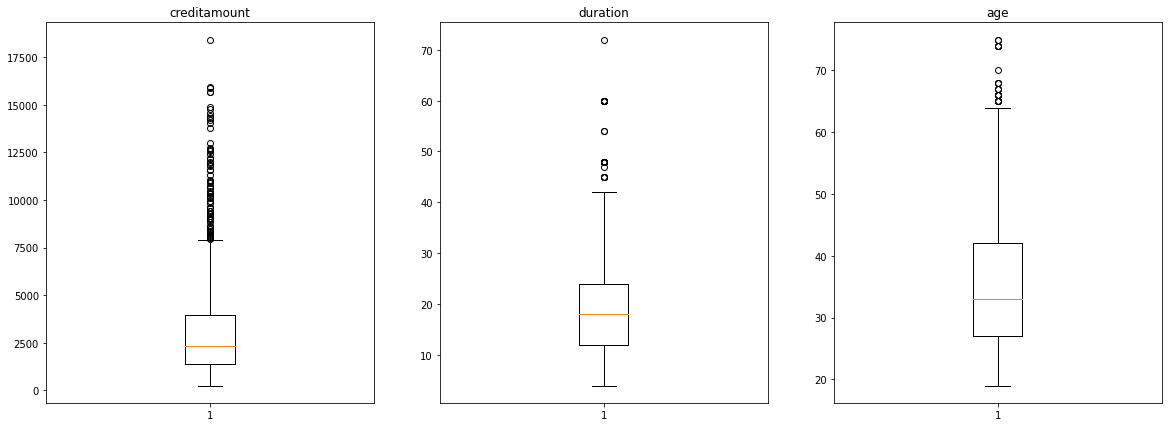

In [11]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,7))
axes[0].boxplot(df['creditamount'])
axes[0].set_title('creditamount')
axes[1].boxplot(df['duration'])
axes[1].set_title('duration')
axes[2].boxplot(df['age'])
axes[2].set_title('age')

fig.savefig("boxplots.png")

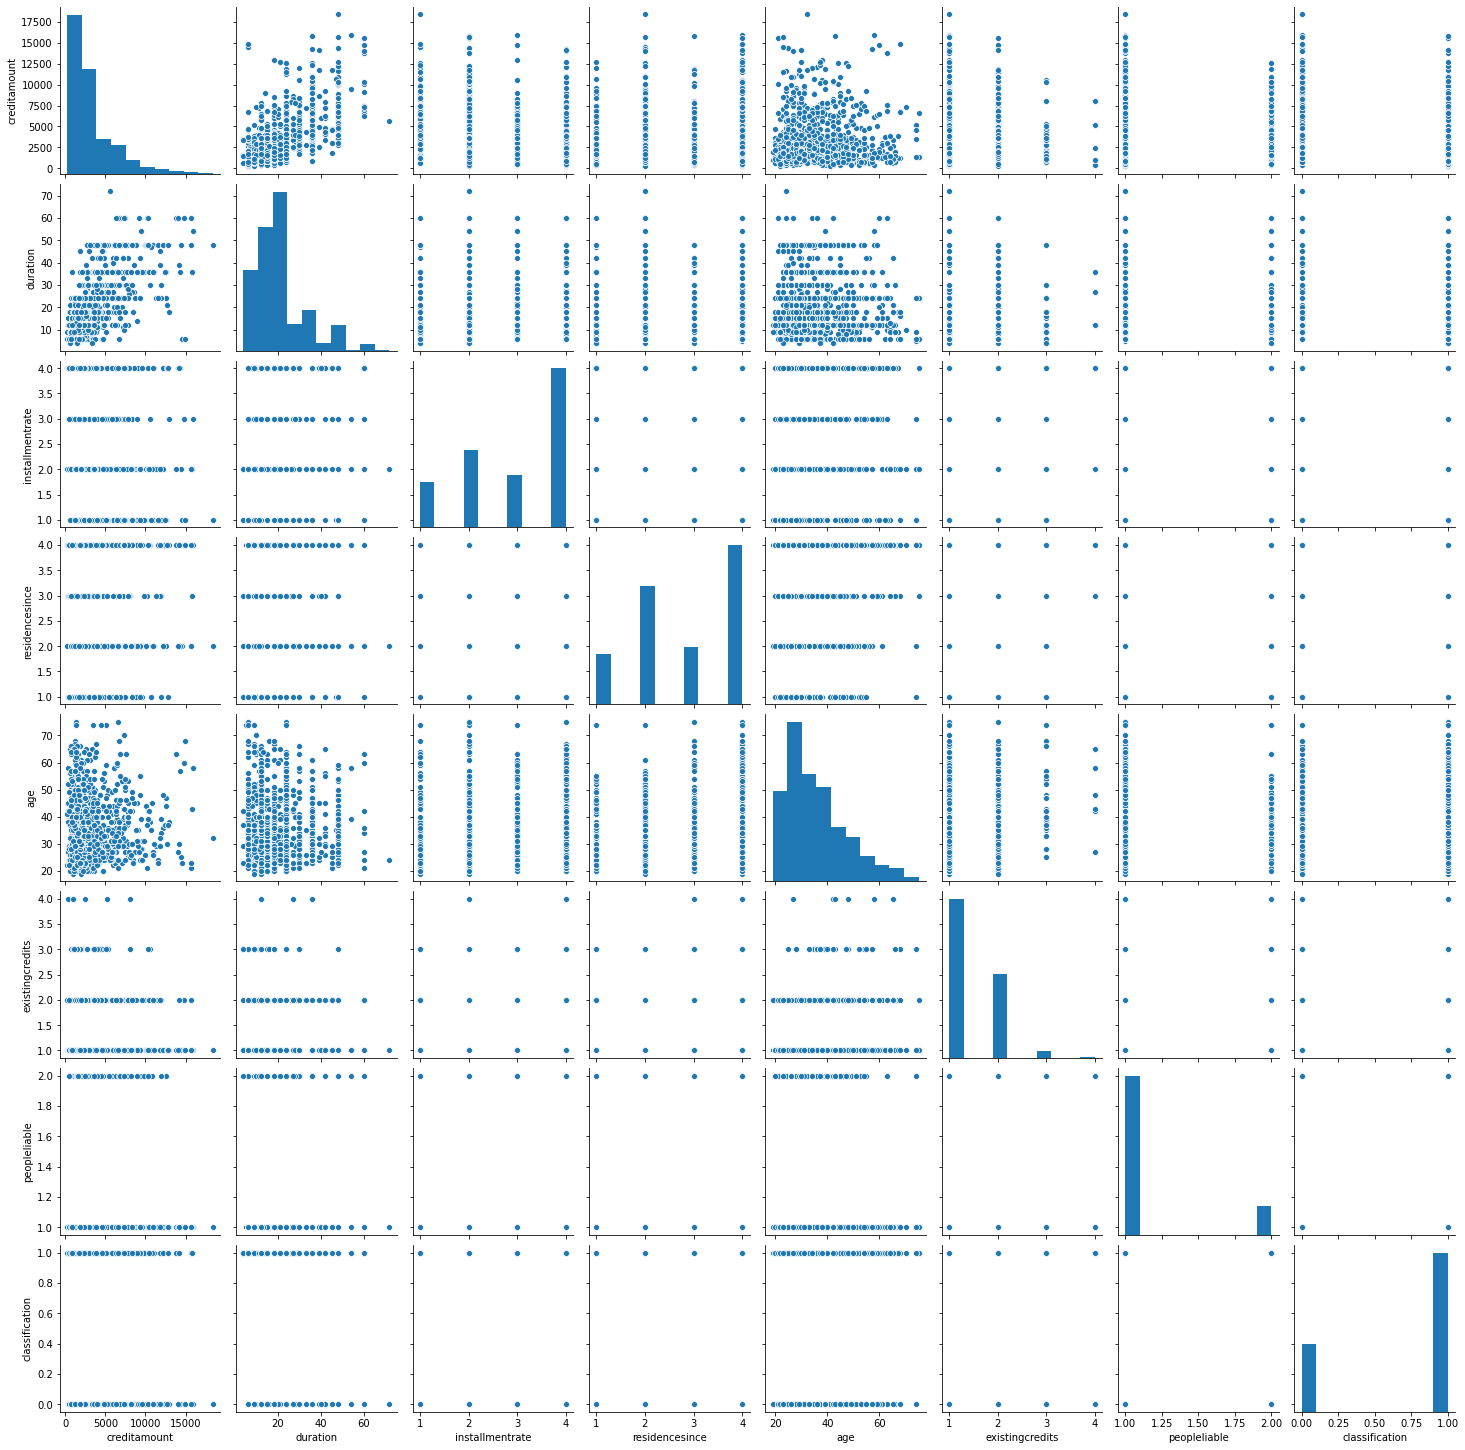

In [12]:
# Data distribution plots for all features
sns.pairplot(df[factors])

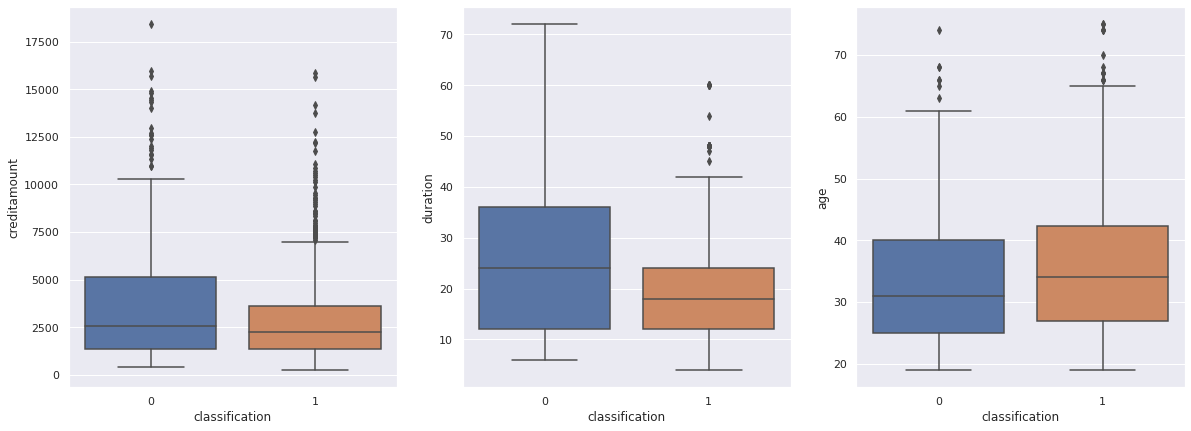

In [13]:
# Identify for any outliers
sns.set()
fig, axes = plt.subplots(1,3, figsize=(20,7))
sns.boxplot(y=df_details["creditamount"],x=df_details["classification"],orient='v', ax=axes[0] )
sns.boxplot(y=df_details["duration"],x=df_details["classification"], orient='v' , ax=axes[1])
sns.boxplot(y=df_details["age"],x=df_details["classification"], orient='v' , ax=axes[2])
plt.show()

**Find Correlation between features**

In [14]:
 # correlation plots for numerical features
corr = df[factors].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Blues')

fig.layout.title = '(Risk Determination?)'
fig.show()

# **Use of 2nd Data Set for Amlgamation**

In [15]:
# Considering another dataset to check for any amalgamation
# Used german_numeric data set

Dataset2_URL="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/german_credit_numeric_data_set.csv"
dataset_amalgam=requests.get(Dataset2_URL).content
df2=pd.read_csv(io.StringIO(dataset_amalgam.decode('utf-8')),sep=',')
print(df2.shape)

(1000, 25)


In [16]:
df2.head()

,C1,C2,C3,C5,C6,C7,C9,C11,C12,C13,C14,C16,C18,C19,C20,C4 (A40),C4 (A41),C10 (A101),C10 (A102),C15 (A151),C15 (A152),C17 (A171),C17 (A172),C17 (A173),C21
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2


In [17]:
df2.describe()

,C1,C2,C3,C5,C6,C7,C9,C11,C12,C13,C14,C16,C18,C19,C20,C4 (A40),C4 (A41),C10 (A101),C10 (A102),C15 (A151),C15 (A152),C17 (A171),C17 (A172),C17 (A173),C21
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,2.675000,1.407000,1.155000,1.404000,1.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,0.705601,0.577654,0.362086,0.490943,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


# **Applying Algorithms on German credit data set**

# **1. K - Means**

In [18]:
# sickit learn library to invoke KMeans algo

from sklearn.cluster import KMeans

x_kmc = X_df[['age','creditamount','duration']]
scaler = StandardScaler()
x_kmc

,age,creditamount,duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


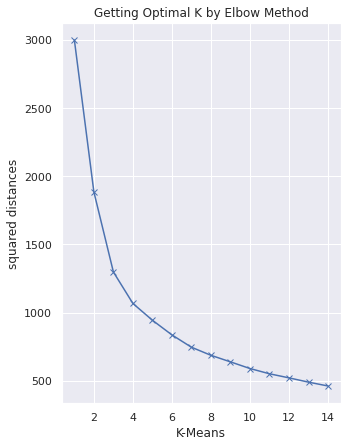

In [19]:
xscaled = scaler.fit_transform(x_kmc)
ksqd = []
KM= range(1,15)
for k in KM:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(xscaled)
    ksqd.append(kmean.inertia_)
plt.figure(figsize=(5,7))
plt.plot(KM, ksqd, 'bx-')
plt.xlabel('K-Means')
plt.ylabel('squared distances')
plt.title('Getting Optimal K by Elbow Method')
plt.show()

In [0]:
kmeans_ = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans_.fit_predict(xscaled)

Cluster in K-Means


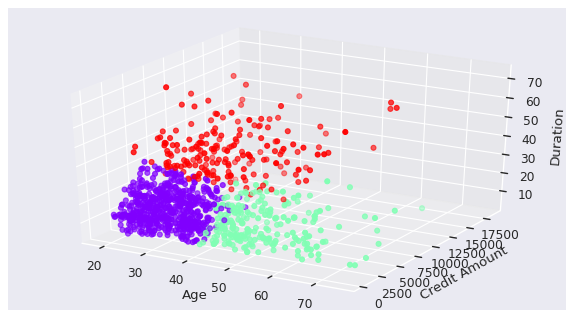

In [50]:
fig = plt.figure(num=None, figsize=(9, 5), dpi=80, facecolor='W', edgecolor='B')

ax = plt.axes(projection="3d")

ax.scatter3D(x_kmc['age'],x_kmc['creditamount'],x_kmc['duration'],c=y_kmeans, cmap='rainbow')
xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Cluster in K-Means")

# **2. GMM Clustering**

In [0]:
# sickit learn library to invoke GMM algo
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, covariance_type="spherical").fit(xscaled)
labels = gmm.predict(xscaled)

GMM_clustering


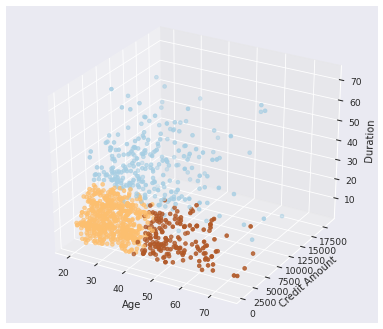

In [53]:
fig = plt.figure(num=None, figsize=(8, 7), dpi=60, facecolor='w', edgecolor='G')
ax = plt.axes(projection="3d")

ax.scatter3D(x_kmc['age'],x_kmc['creditamount'],x_kmc['duration'],c=labels, cmap=plt.cm.Paired)

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("GMM_clustering")

# **3. Linear Regression**

In [0]:
# sickit learn for Linear Model algo

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
xtrain = df_details[[ 'creditamount','duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']]
ytrain = df_details['creditamount']

Xtrain,Xtest,Ytrain,Ytest=train_test_split(xtrain,ytrain,test_size=0.10,random_state=2)
xtrain.head()

corr = xtrain.corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Blues')
fig.show()

In [26]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
results = mean_squared_error(y_pred, Ytest)
print(results)
model.score(Xtest,Ytest)

7.918961895488126e-25


1.0

# **4. PCA - Principle Component Analysis**

Text(0, 0.5, 'Second Principal Component')

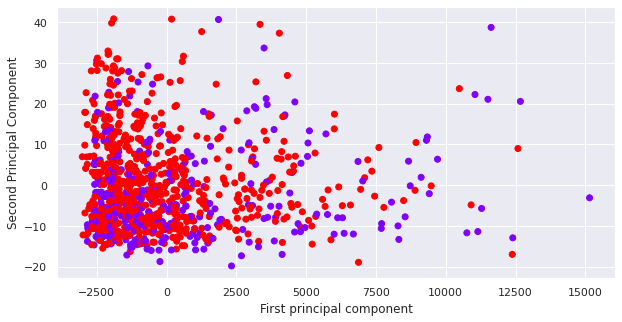

In [27]:
# Sickit learn for PCA analysis
pca = PCA(n_components=12)
X = pca.fit_transform(X_df)
plt.figure(figsize=(10,5))

plt.scatter(X[:,0],X[:,1],c=df_details['classification'],cmap='rainbow')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# **5. Logistic Regression** 

In [28]:
# sickit learn for logistic regression Model algo

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y_df, test_size = 0.30,random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)

y_logreg_pred=model.predict(X_test)
res = mean_squared_error(y_logreg_pred, y_test)

print(res)
model.score(X_test,y_test)

print("Accuracy of Logistic Regression: ")
print(round(accuracy_score(y_test,y_logreg_pred)*100,2))

0.23
Accuracy of Logistic Regression: 
77.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [29]:
evaluation= confusion_matrix(y_test, y_logreg_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_logreg_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.62      0.52      0.57        86
        Good       0.82      0.87      0.84       214

    accuracy                           0.77       300
   macro avg       0.72      0.70      0.70       300
weighted avg       0.76      0.77      0.76       300



# **6. XGBOOST**

In [30]:
# XGBOOST model predict and accuracy

from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y_df, test_size = 0.30,random_state=0)

model=XGBClassifier()
model.fit(X_train, y_train)
y_xgb_pred = model.predict(X_test)
print("Accuracy of XGBOOST: ")
print(round(accuracy_score(y_test,y_xgb_pred)*100,2))

Accuracy of XGBOOST: 
77.67


In [31]:
evaluation= confusion_matrix(y_test, y_xgb_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_xgb_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.67      0.44      0.53        86
        Good       0.80      0.91      0.85       214

    accuracy                           0.78       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.76      0.78      0.76       300



# **7. Random Forest**

In [32]:
# sickit learn for Random Forest Model algo

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_randforest_pred = model.predict(X_test)

print("Accuracy of Radom Forest: ")
print(round(accuracy_score(y_test,y_randforest_pred)*100,2))

Accuracy of Radom Forest: 
76.33


In [33]:
evaluation= confusion_matrix(y_test, y_randforest_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_randforest_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.64      0.41      0.50        86
        Good       0.79      0.91      0.85       214

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.75      0.76      0.75       300



# **8. SVM**

In [34]:
from sklearn import svm, tree

model = svm.LinearSVC( class_weight="balanced",dual=False)
model.fit(X_train, y_train)
y_svm_pred = model.predict(X_test)


print("Accuracy of SVM: ")
print(round(accuracy_score(y_test,y_svm_pred)*100,2))


Accuracy of SVM: 
70.0


In [35]:
evaluation= confusion_matrix(y_test, y_svm_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_svm_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.49      0.77      0.59        86
        Good       0.88      0.67      0.76       214

    accuracy                           0.70       300
   macro avg       0.68      0.72      0.68       300
weighted avg       0.77      0.70      0.71       300



# **9. K-NN**


In [36]:
# sickit learn for KNN Model algo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_knn_pred = model.predict(X_test)
knn.score(X_train, y_train)

0.7271428571428571

In [37]:
knn.score(X_test, y_test)

0.68

In [38]:
print("Accuracy of KNN: ")
print(round(accuracy_score(y_test,y_knn_pred)*100,2))


Accuracy of KNN: 
70.0


In [39]:
evaluation= confusion_matrix(y_test, y_knn_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_knn_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.49      0.77      0.59        86
        Good       0.88      0.67      0.76       214

    accuracy                           0.70       300
   macro avg       0.68      0.72      0.68       300
weighted avg       0.77      0.70      0.71       300



# **10. Naive Bayes**

In [40]:
# sickit learn for Naive Bayes Model algo
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()    
model.fit(X_train, y_train)
y_naive_pred = model.predict(X_test)
print("Accuracy of Naive Bayes: ")
print(round(accuracy_score(y_test,y_naive_pred)*100,2))

Accuracy of Naive Bayes: 
75.33


In [41]:
evaluation= confusion_matrix(y_test, y_naive_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_naive_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.61      0.40      0.48        86
        Good       0.79      0.90      0.84       214

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.74      0.75      0.74       300



# **Latent Variables and Latent Manifold Identification**

In [0]:
#pip install factor_analyzer

In [43]:
import factor_analyzer
from factor_analyzer import FactorAnalyzer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
fa=FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(X_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [0]:
loadings=fa.loadings_

In [0]:
ev,v=fa.get_eigenvalues()

In [0]:
Xvals=range(1,X_df.shape[1]+1)

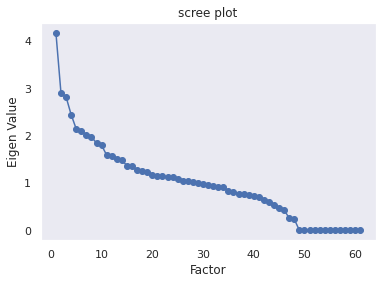

In [47]:
plt.scatter(Xvals,ev)
plt.plot(Xvals,ev)
plt.title('scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

In [48]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.597080,0.026020,0.074347,0.033857,-0.070562,0.134846
1,0.437564,0.020695,0.059725,-0.125197,-0.049605,0.133183
2,-0.065971,0.154429,0.017780,-0.158673,0.009548,-0.026396
3,0.073128,0.181603,0.353249,-0.020222,0.021676,-0.079338
4,0.066614,0.469959,0.211612,0.031872,0.030722,-0.002297
...,...,...,...,...,...,...
56,0.521037,0.066112,0.063629,0.061529,-0.023878,0.120822
57,-0.740133,-0.137925,0.101063,0.031383,-0.037771,0.026469
58,0.740133,0.137925,-0.101063,-0.031383,0.037771,-0.026469
59,0.106268,-0.047271,0.131110,-0.918522,0.105630,0.076715


# **Interpretation and Evaluation of Metrics for each Algorithm**

In [49]:
print("-------------------------------------------------------")
print("1. Evaluation Metrics of : LogisticRegression\n",classification_report(y_test, y_logreg_pred, target_names=labels))
print("-------------------------------------------------------")
print("2. Evaluation Metrics of : XG Boost\n",classification_report(y_test, y_xgb_pred, target_names=labels))
print("-------------------------------------------------------")
print("3. Evaluation Metrics of : Random Forest\n",classification_report(y_test, y_randforest_pred, target_names=labels))
print("-------------------------------------------------------")
print("4. Evaluation Metrics of : SVM \n",classification_report(y_test, y_svm_pred, target_names=labels))
print("-------------------------------------------------------")
print("5. Evaluation Metrics of : KNN\n",classification_report(y_test, y_knn_pred, target_names=labels))
print("-------------------------------------------------------")
print("6. Evaluation Metrics of : Naive Bayes\n",classification_report(y_test, y_naive_pred, target_names=labels))

-------------------------------------------------------
1. Evaluation Metrics of : LogisticRegression
               precision    recall  f1-score   support

         Bad       0.62      0.52      0.57        86
        Good       0.82      0.87      0.84       214

    accuracy                           0.77       300
   macro avg       0.72      0.70      0.70       300
weighted avg       0.76      0.77      0.76       300

-------------------------------------------------------
2. Evaluation Metrics of : XG Boost
               precision    recall  f1-score   support

         Bad       0.67      0.44      0.53        86
        Good       0.80      0.91      0.85       214

    accuracy                           0.78       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.76      0.78      0.76       300

-------------------------------------------------------
3. Evaluation Metrics of : Random Forest
               precision    recall  f1-score   suppor

# **Conclusion**



> In this study, Set of **10 models were compared** on their accuracy on the German credit risk modelling from credit classification of probability of default values.
  

> Firstly, we enrichd data and understood data is in form of binary classification. It should be noted that the problem is **better solved in supervised algorithms** compared against unsupervised.



> Upon all the model, we can see **XG Boost performed better**. Its also important to note the **Logistic regression and Random Forest also performed well.**

